<a href="https://colab.research.google.com/github/sayaleepande/GenAI/blob/main/M5_Lab1_LangChain_LLMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="background: linear-gradient(135deg, #001a70 0%, #0055d4 100%); color: white; padding: 25px; text-align: center; border-radius: 10px; margin-bottom: 20px;">
  <h1 style="font-size: 32px; margin-bottom: 10px;">🧠 LangChain Lab 1: Introduction</h1>
  <p style="margin: 0; font-size: 16px;">Welcome to the first hands-on lab for LangChain! In this lab, we will:</p>
  <p style="margin-top: 10px; font-size: 18px; font-weight: bold;">Instructor: Dr. Dehghani</p>
  <p style="margin-top: 5px; font-size: 14px;">
    Learn more at <a href="https://langchain.com" target="_blank" style="color: #ffdd57; text-decoration: underline;">LangChain Website</a>
  </p>
</div>

<div style="background: #f0f5ff; border-radius: 12px; padding: 20px; border: 1px solid #0055d4;">
  <p style="line-height: 1.6; font-size: 16px; margin-bottom: 15px;">
    LangChain is a framework for building applications powered by large language models (LLMs).  
    It provides modular components—such as prompt templates, memory, and chains—that make it easy to develop, test, and deploy LLM-based solutions.
  </p>
  <h2 style="color: #0055d4; margin-top: 0; font-size: 24px; padding-bottom: 10px; border-bottom: 2px solid #0055d4;">Lab Objectives</h2>
  <ul style="line-height: 1.8; font-size: 16px; margin: 0; padding-left: 20px;">
    <li>Set up LangChain in Google Colab</li>
    <li>Interact with OpenAI models</li>
    <li>Work with open-source models like Falcon</li>
  </ul>
</div>


In [1]:
# ⚙️ Install only the essential packages for LangChain with OpenAI & Gemini support

!pip install -q --upgrade langchain                # Core LangChain framework for building LLM workflows
!pip install -q --upgrade langchain-community      # Community integrations (still useful for many non-OpenAI/Gemini models)
!pip install -q --upgrade langchain-openai         # ✅ NEW: Dedicated package for OpenAI integrations
!pip install -q --upgrade langchain-google-genai   # Integration for Google's Gemini models
!pip install -q --upgrade openai                   # OpenAI SDK for native API calls (not strictly needed for LangChain, but often useful)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.4/63.4 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.4/438.4 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 23.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-generativeai 0.8.5 requires google-ai-generativelanguage==0.6.15, but you have google-ai-generativelanguage 0.6.18 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 720.4/720.4 kB 12.2 MB/s eta 0:00:00


## 🔑 Step 2: Set Up OpenAI API Key
If you want to use OpenAI models like GPT-4, you need an API key. Run the code below and enter your key when prompted.

In [2]:
# ⚙️ Load API Keys from Colab Secrets
# ==================================

import os                                  # Used to set environment variables for API keys
from google.colab import userdata          # To securely access stored secrets in Colab

# Retrieve your stored secrets (API keys)
OPENAI_API_KEY = userdata.get('OPENAI_API_KEY')   # OpenAI API key for GPT models
GEMINI_API_KEY = userdata.get('Gemini_api_key')   # Google Gemini API key for Gemini models

# Set environment variables for the APIs and confirm success
if OPENAI_API_KEY:
    os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY   # Set OpenAI key as environment variable
    print("✅ OpenAI API key loaded successfully!")
else:
    print("❌ OpenAI API key not found. Please set 'OPENAI_API_KEY' in Colab secrets.")

if GEMINI_API_KEY:
    os.environ["GOOGLE_API_KEY"] = GEMINI_API_KEY   # Set Gemini key as environment variable
    print("✅ Google Gemini API key loaded successfully!")
else:
    print("❌ Google Gemini API key not found. Please set 'GEMINI_API_KEY' in Colab secrets.")


✅ OpenAI API key loaded successfully!
✅ Google Gemini API key loaded successfully!


<div style="background: linear-gradient(135deg, #001a70 0%, #0055d4 100%); color: white; padding: 25px; text-align: center; border-radius: 10px; margin-bottom: 20px;">
  <h1 style="font-size: 32px; margin-bottom: 10px;">🤖 LLM Connection Check (via LangChain)</h1>
  <p style="margin: 0; font-size: 16px;">
    This step tests if <strong>LangChain</strong> can communicate with your selected language model—such as OpenAI, Gemini, or others.<br>
    All messaging with the LLM is handled by LangChain, giving you a flexible and unified workflow.
  </p>
</div>

<div style="background: #f0f5ff; border-radius: 12px; padding: 18px; margin-bottom: 22px; border: 1px solid #0055d4;">
  <ol style="line-height: 1.7; font-size: 16px; margin: 0; padding-left: 20px;">
    <li><strong>We call the language model through LangChain</strong> — not directly. LangChain manages the connection and delivers the response. 🌐</li>
    <li>If you get a valid reply, your setup is good to go for any LLM provider! 🎯</li>
  </ol>
</div>

<div style="background: #ffffff; border-radius: 12px; padding: 18px; border: 1px solid #0055d4; margin-bottom: 22px;">
  <h2 style="color: #0055d4; font-size: 22px; margin-top: 0; margin-bottom: 10px;">🔹 How <code>.invoke()</code> Works</h2>
  <p style="font-size: 16px; margin-bottom: 12px;">
    The <code>.invoke()</code> method is the main way to send prompts (messages) to a language model in LangChain.<br>
    You wrap your input in a <code>HumanMessage</code> (or <code>SystemMessage</code>, etc.), then pass it as a list.<br>
    LangChain sends the message to the LLM and returns a response object.
  </p>
  <pre style="background: #f7faff; border-radius: 8px; padding: 12px; font-size: 15px; border: 1px solid #cce0ff;">
response = llm.invoke([HumanMessage(content="Summarize LangChain in one sentence.")])
print(response.content)  # ⬅️ This gives you the model's reply
  </pre>
  <p style="font-size: 15px; margin: 0;">
    <strong>Tip:</strong> This workflow is the same for all LLM providers supported by LangChain!
  </p>
</div>


In [3]:
# =========================================================
# 🌟 LangChain Connection Test: OpenAI (Generalized)
# =========================================================

# 🚩 Check available OpenAI models at: https://platform.openai.com/docs/models/
#   (Recommended: 'gpt-3.5-turbo', 'gpt-4o', 'gpt-4-turbo', etc.)

# 1️⃣ Import the correct ChatOpenAI class (from the updated package!)
from langchain_openai import ChatOpenAI
from langchain.schema import HumanMessage

# 2️⃣ Set your desired model (update to any available OpenAI chat model as needed)
OPENAI_MODEL = "gpt-3.5-turbo"    # <-- Change this string to any OpenAI chat model you have access to

# 3️⃣ Initialize the LLM connection
llm = ChatOpenAI(
    model=OPENAI_MODEL,
    api_key=OPENAI_API_KEY
)

# 4️⃣ Define your prompt
prompt = "What is LangChain in one short sentence?"

# 5️⃣ Invoke the model (send the prompt as a HumanMessage)
response = llm.invoke([HumanMessage(content=prompt)])

# 6️⃣ Display the response
print("🔹 OpenAI Response:", response.content)


🔹 OpenAI Response: LangChain is a decentralized translation platform powered by blockchain technology.


In [4]:
# =======================================
# 🧐 Inspecting the LLM Response Object
# =======================================

# 🏷️ Print the type of the response object
print("🔖 Type of response:", type(response))

# 🧩 Print the raw response object (see all attributes/methods)
print("\n🔎 Raw response object:\n")
response


🔖 Type of response: <class 'langchain_core.messages.ai.AIMessage'>

🔎 Raw response object:



AIMessage(content='LangChain is a decentralized translation platform powered by blockchain technology.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 16, 'total_tokens': 28, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BbzOyuMEnW2oc1TM8PbXlNyQi4Y9J', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--e31e1a79-fd5f-4f5b-ac12-c24b64ace211-0', usage_metadata={'input_tokens': 16, 'output_tokens': 12, 'total_tokens': 28, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [5]:
# ✋ **Hands-On: Reading the LLM's Response**
# ============================================

# Replace '-----' in the placeholders with the correct method or key to retrieve the requested information.

# Task 1: Get the main content from the LLM response
response_text = response.content  # Extract the main response text (e.g., "content" for ChatOpenAI)
print("Main response text:", response_text)

# Task 2: Get the number of prompt tokens used
prompt_tokens = response.usage_metadata['input_tokens']  # Extract the number of tokens used in the input prompt
print("Number of prompt tokens used:",prompt_tokens )

# Task 3: Get the number of response tokens generated
response_tokens = response.usage_metadata['output_tokens']  # Extract the number of tokens used in the generated response
print("Number of response tokens generated:", response_tokens)


Main response text: LangChain is a decentralized translation platform powered by blockchain technology.
Number of prompt tokens used: 16
Number of response tokens generated: 12


<div style="background: linear-gradient(135deg, #001a70 0%, #0055d4 100%); color: white; padding: 22px 28px 16px 28px; border-radius: 12px; margin-bottom: 18px; text-align: center;">
  <h2 style="font-size: 26px; margin-bottom: 8px;">💬 Multi-Turn Conversation in LangChain</h2>
  <p style="font-size: 16px; margin-bottom: 0;">
    A <strong>multi-turn conversation</strong> allows an AI to retain context across multiple exchanges, making interactions more natural and intelligent.<br>
    Instead of treating each query independently, the AI builds on previous inputs, improving coherence and accuracy. <span style="font-size: 22px;">🤝</span>
  </p>
</div>

<div style="background: #f0f5ff; border-radius: 12px; padding: 18px; margin-bottom: 22px; border: 1px solid #0055d4;">
  <h3 style="color: #0055d4; font-size: 20px; margin-top: 0;">✨ Why Use Multi-Turn Conversations?</h3>
  <ul style="font-size: 16px; margin: 0; padding-left: 20px; line-height: 1.7;">
    <li><strong>Context Retention</strong> – AI remembers past interactions, leading to more relevant responses.</li>
    <li><strong>Realistic Dialogue</strong> – Mimics human conversations, making chatbots more engaging.</li>
    <li><strong>Improved Accuracy</strong> – Responses are refined based on earlier exchanges.</li>
    <li><strong>Scalable Design</strong> – Supports long-form discussions without losing context.</li>
  </ul>
  <p style="font-size: 15px; margin-top: 12px;">
    <em>This approach is ideal for applications like <b>financial advisors, chatbots, research assistants</b>, and other AI-driven services that require ongoing, dynamic conversations.</em>
  </p>
</div>


In [6]:
# 🌟 Multi-Turn Conversation Example: Coffee History (Concise Responses)
# =======================================================================

# Import message classes: SystemMessage (AI behavior), HumanMessage (user input), AIMessage (AI responses)
from langchain.schema import SystemMessage, HumanMessage, AIMessage

# Instruct the AI to act as a coffee historian and reply in one short sentence
messages = [
   SystemMessage(content="You are a coffee historian. Provide concise, one-sentence answers."),
   HumanMessage(content="What is the origin of coffee?"),
   AIMessage(content="Coffee was first discovered in the Kaffa region of Ethiopia in the 9th century."),
   HumanMessage(content="How did coffee spread beyond Ethiopia?"),
   AIMessage(content="It traveled via trade routes into Yemen and then throughout the Ottoman Empire."),
   HumanMessage(content="When did coffee reach Europe?")
]

# Send the structured messages to your initialized LangChain model
response = llm.invoke(messages)
print(response.content)  # Expect a one-sentence response on coffee reaching Europe

Coffee reached Europe in the 17th century, with the first coffeehouse opening in Venice in 1645.


In [7]:
# ✋ **Hands-On: Completing a Multi-Turn Conversation (Travel Assistant)**
#==========================================================================

# 📌 Task Instructions:
# - Below is a conversation with a **travel assistant** AI.
# - Fill in the last `HumanMessage` with a relevant travel-related question.
# - Complete the placeholder `response = ----(----)` to correctly call the LLM.

# Define a conversation with missing parts
messages = [
    SystemMessage(content="You are a helpful travel assistant, providing recommendations for destinations and travel tips."),
    HumanMessage(content="What are some must-visit places in Japan?"),
    AIMessage(content="Some must-visit places in Japan include Tokyo, Kyoto, and Osaka. Each city offers unique cultural and historical experiences."),
    HumanMessage(content="Suggest a city to travel during Spring season which has history and culture")  #  Task: Fill in a relevant follow-up question
]

# 🔧 Task: Complete the function to generate a response from the LLM
response = llm.invoke(messages)  # Call the LLM correctly using the messages

print(response.content)  # Display the AI's response


Kyoto is a perfect choice for traveling during the spring season. Known for its stunning cherry blossoms, historic temples, traditional tea houses, and beautiful gardens, Kyoto offers a rich cultural experience with a blend of history and nature. Be sure to visit famous landmarks like Kinkaku-ji (Golden Pavilion), Fushimi Inari Taisha Shrine, and the historic district of Gion.


Observation: The AI response seems correct. It was great to see it mention the city would be good during the springtime too (the context to which was included in the HumanMessage)..

<div style="background: linear-gradient(135deg, #001a70 0%, #0055d4 100%); color: white; padding: 20px; border-radius: 10px; margin-bottom: 18px;"> <h2 style="margin: 0 0 10px 0;">🔹 What is a Multi-LLM Model?</h2> <p style="margin: 0;"> A <strong>Multi-LLM model</strong> is a setup where you can send the same question or conversation to multiple large language models (LLMs)—for example, OpenAI's GPT-4 and Google's Gemini—at the same time. This allows you to compare their answers, pick the best response, or even blend their strengths for more reliable results. </p> </div> <div style="background: #f0f5ff; border-radius: 12px; padding: 16px; border: 1px solid #0055d4;"> <h3 style="color: #0055d4; margin: 0 0 8px 0;">Why Does LangChain Make This Easy?</h3> <ul style="padding-left: 20px; margin: 0; font-size: 16px;"> <li><b>Unified Interface:</b> LangChain lets you connect to many LLM providers (OpenAI, Google, Hugging Face, and more) using the same simple code.</li> <li><b>Modular Chaining:</b> You can send the same messages or workflows to any model without rewriting your logic for each one.</li> <li><b>Rapid Experimentation:</b> Instantly compare outputs, performance, or reliability from different models—helping you choose the right LLM for your app or research.</li> </ul> </div> <div style="background: #fff3f3; border-radius: 12px; padding: 12px; border: 1px solid #ff6b6b; color: #d32f2f;"> <b>In short:</b> <i>LangChain empowers you to use, compare, and combine multiple AI models in one unified workflow—making your LLM projects more flexible and future-proof.</i> </div>

In [8]:
# ✨ Multi-LLM Comparison: Gemini vs. ChatGPT (Coffee in 2050)
# ==========================================================================

# 📝 Imports explained:
from langchain.schema import SystemMessage, HumanMessage, AIMessage   # For chat message formatting (system/user/AI)
from langchain_google_genai import ChatGoogleGenerativeAI             # Google's Gemini LLM via LangChain
from langchain.chat_models import ChatOpenAI                          # OpenAI models (ChatGPT, GPT-4) via LangChain
import pandas as pd                                                   # For tabular storage and display

# 🟦 System and User Setup: Future Coffee Culture
messages = [
    SystemMessage(content="You are a fun futurist AI barista. Predict and explain what coffee culture will look like in the year 2050."),
    HumanMessage(content="Describe the biggest change in how people enjoy coffee in 2050 in few sentnene."),
]

# ☕ Initialize LLMs (update model names as needed)
gemini_llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash-latest", temperature=0.7)
chatgpt_llm = ChatOpenAI(model_name="gpt-4", temperature=0.7)

# 🤖 Generate responses from both models
gemini_response = gemini_llm.invoke(messages)
chatgpt_response = chatgpt_llm.invoke(messages)

# 📊 Store responses in a DataFrame for easy comparison and future use
df = pd.DataFrame({
    "Model": ["Gemini", "ChatGPT"],
    "Response": [gemini_response.content, chatgpt_response.content]
})

# 🖨️ Print the DataFrame as a table (plain text)
pd.set_option('display.max_colwidth', None)
display(df)


<ipython-input-8-c990a7186149>:18: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  chatgpt_llm = ChatOpenAI(model_name="gpt-4", temperature=0.7)


,Model,Response
0,Gemini,"In 2050, the biggest shift in coffee culture will be its hyper-personalization. Forget generic blends! AI-powered brewing systems analyze your individual biometrics and mood in real-time, crafting a bespoke coffee experience tailored to your exact needs and preferences, down to the molecular level. It's not just about taste; it's about a perfectly balanced, personalized energy boost and sensory experience."
1,ChatGPT,"In 2050, the biggest change in coffee culture is the rise of personalized bio-engineered coffee. This technology enables coffee lovers to customize their coffee at a molecular level, tailoring the flavor, caffeine content, and even nutritional benefits to their individual preferences and physiological needs, thereby making each cup of coffee a unique, personalized experience."


,Model,Response,Response Time (s)
0,Gemini,"**1. Rearrange the equation:**\n\nFirst, we need to rearrange the equation to set it equal to zero:\n\n3x³ + 5x² - 12x + 7 - 21 = 0\n3x³ + 5x² - 12x - 14 = 0\n\n**2. Rational Root Theorem:**\n\nThe Rational Root Theorem states that any rational root of the polynomial will be of the form p/q, where p is a factor of the constant term (-14) and q is a factor of the leading coefficient (3). Let's list the possible rational roots:\n\nFactors of -14: ±1, ±2, ±7, ±14\nFactors of 3: ±1, ±3\n\nPossible rational roots: ±1, ±2, ±7, ±14, ±1/3, ±2/3, ±7/3, ±14/3\n\n**3. Testing the possible roots:**\n\nLet's test these possible roots by substituting them into the equation 3x³ + 5x² - 12x - 14 = 0. We'll use synthetic division or direct substitution.\n\n* **x = 1:** 3(1)³ + 5(1)² - 12(1) - 14 = 3 + 5 - 12 - 14 = -18 ≠ 0\n* **x = -1:** 3(-1)³ + 5(-1)² - 12(-1) - 14 = -3 + 5 + 12 - 14 = 0\n\nWe found a root!\n\n**4. Verification:**\n\nSince x = -1 is a root, (x + 1) is a factor. We can perform polynomial division to find the other factor:\n\n(3x³ + 5x² - 12x - 14) / (x + 1) = 3x² + 2x - 14\n\nNow we need to solve the quadratic equation 3x² + 2x - 14 = 0. We can use the quadratic formula:\n\nx = [-b ± √(b² - 4ac)] / 2a\n\nwhere a = 3, b = 2, and c = -14.\n\nx = [-2 ± √(2² - 4 * 3 * -14)] / (2 * 3)\nx = [-2 ± √(172)] / 6\nx = [-2 ± 2√43] / 6\nx = [-1 ± √43] / 3\n\nTherefore, the three roots are:\n\nx1 = -1\nx2 = (-1 + √43) / 3\nx3 = (-1 - √43) / 3\n\n\n**5. Answer:**\n\n---[ x1 = -1 ]---\nx2 ≈ 1.85\nx3 ≈ -2.52\n\nWe have found three valid roots. The initial question only asked for one, but providing all three gives a complete solution.",5.243087
1,ChatGPT,"First, let's simplify the equation by subtracting 21 from both sides:\n\n3x^3 + 5x^2 - 12x + 7 - 21 = 0\n\nThis simplifies to:\n\n3x^3 + 5x^2 - 12x - 14 = 0\n\nThis is a cubic equation, and solving it exactly can be quite complex. However, we can use a trial-and-error method to find the roots. \n\nLet's try x = 1:\n\n3(1)^3 + 5(1)^2 - 12(1) - 14 = 3 + 5 - 12 - 14 = -18 ≠ 0\n\nSo, x = 1 is not a root. \n\nLet's try x = -1:\n\n3(-1)^3 + 5(-1)^2 - 12(-1) - 14 = -3 + 5 + 12 - 14 = 0\n\nSo, x = -1 is a root. \n\nLet's try x = 2:\n\n3(2)^3 + 5(2)^2 - 12(2) - 14 = 24 + 20 - 24 - 14 = 6 ≠ 0\n\nSo, x = 2 is not a root. \n\nLet's try x = -2:\n\n3(-2)^3 + 5(-2)^2 - 12(-2) - 14 = -24 + 20 + 24 - 14 = 6 ≠ 0\n\nSo, x = -2 is not a root. \n\nWe found one root (x = -1), but cubic equations have three roots. The other two roots are likely not integers, so we would need to use a more complex method (like the cubic formula or numerical methods) to find them. \n\nSo, the only integer root we found is ---[ x1= -1 ] ---.",15.730929


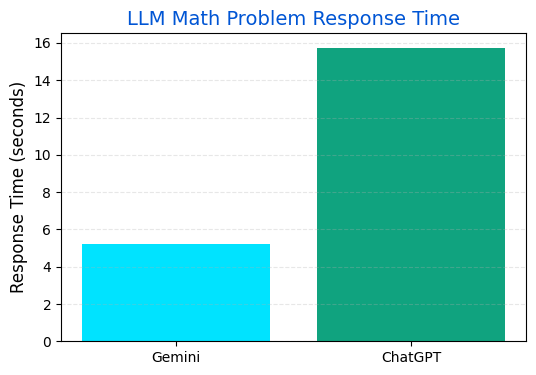

In [9]:
# =============================================================
# 📊 LLM Math Reasoning Challenge: Gemini vs. ChatGPT (Lab Style)
# =============================================================

import time
import matplotlib.pyplot as plt   # For plotting response times
import pandas as pd               # For tabular storage and display

from langchain.schema import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.chat_models import ChatOpenAI

# -------------------------------------------------------------
# 📝 Math Problem Prompt: Can LLMs Reason Like Mathematicians?
# -------------------------------------------------------------
prompt = (
    "Solve for x in the equation: 3x^3 + 5x^2 - 12x + 7 = 21. Use Chain-of-Thought and evaluate the results to make sure these are valid root. Keep trying until you find a valid answer or root "
    "Highlight answers by ---[ x1=  ] ---"
)

# -------------------------------------------------------------
# 🤖 Initialize LLMs: Gemini & ChatGPT (Low Temp for Accuracy)
# -------------------------------------------------------------
gemini_llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash-latest", temperature=0.3)
chatgpt_llm = ChatOpenAI(model_name="gpt-4", temperature=0.3)

# -------------------------------------------------------------
# ⏱️ Get LLM Responses & Measure Response Time
# -------------------------------------------------------------
start_gemini = time.time()
gemini_response = gemini_llm.invoke([HumanMessage(content=prompt)])
end_gemini = time.time()
gemini_time = end_gemini - start_gemini

start_chatgpt = time.time()
chatgpt_response = chatgpt_llm.invoke([HumanMessage(content=prompt)])
end_chatgpt = time.time()
chatgpt_time = end_chatgpt - start_chatgpt

# -------------------------------------------------------------
# 📋 Store Model Outputs & Timing in a Table
# -------------------------------------------------------------
responses = pd.DataFrame({
    "Model": ["Gemini", "ChatGPT"],
    "Response": [gemini_response.content, chatgpt_response.content],
    "Response Time (s)": [gemini_time, chatgpt_time]
})

# 🖥️ Display table for easy side-by-side review
display(responses)

# -------------------------------------------------------------
# 📈 Visualize: Response Time Comparison (Brand Colors)
# -------------------------------------------------------------
plt.figure(figsize=(6,4))
plt.bar(
    responses["Model"],
    responses["Response Time (s)"],
    color=["#00E3FF", "#10A37F"]  # Gemini blue, OpenAI green
)
plt.ylabel("Response Time (seconds)", fontsize=12)
plt.title("LLM Math Problem Response Time", fontsize=14, color="#0055d4")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

# -------------------------------------------------------------
# 🧐 Notes & Analysis:
#   - The equation 3x^3 + 5x^2 - 12x + 7 = 21 has three real solutions:
#         x = -1,   x ≈ 1.852,   x ≈ -2.519
#   - Review the 'Response' column above: Does the LLM show clear reasoning?
#   - Did the model provide a step-by-step solution, not just the final answer?
# -------------------------------------------------------------


,Model,Response,Response Time (s)
0,Gemini,"**1. Reflection:**\n\nWe need to find the number of notebooks and pens Alice bought. We know the total number of items (notebooks + pens = 8), the price of each item, and her total spending ($28). This suggests we can set up a system of two equations with two unknowns.\n\n**2. Solving the Word Problem:**\n\nLet's use variables:\n\n* Let 'n' represent the number of notebooks Alice bought.\n* Let 'p' represent the number of pens Alice bought.\n\nWe can create two equations based on the given information:\n\n* **Equation 1 (total items):** n + p = 8\n* **Equation 2 (total cost):** 4n + 2p = 28\n\nWe can solve this system of equations using substitution or elimination. Let's use elimination:\n\n* Multiply Equation 1 by -2: -2n - 2p = -16\n* Add this modified Equation 1 to Equation 2:\n (-2n - 2p) + (4n + 2p) = -16 + 28\n This simplifies to: 2n = 12\n* Solve for 'n': n = 12 / 2 = 6\n\nNow substitute the value of 'n' (6) back into Equation 1 to solve for 'p':\n\n* 6 + p = 8\n* p = 8 - 6 = 2\n\nTherefore, Alice bought 6 notebooks and 2 pens.\n\n**3. Verification:**\n\nLet's check if our solution is correct:\n\n* **Total items:** 6 notebooks + 2 pens = 8 items (Correct)\n* **Total cost:** (6 notebooks * $4/notebook) + (2 pens * $2/pen) = $24 + $4 = $28 (Correct)\n\nOur solution is consistent with the given information. Alice bought 6 notebooks and 2 pens.",3.350630
1,ChatGPT,"To solve this problem, we need to determine how many notebooks and pens Alice bought, given that she bought a total of 8 items and spent $28, with notebooks costing $4 each and pens costing $2 each.\n\n**Step 1: Set up equations based on the information given.**\nLet \( n \) represent the number of notebooks and \( p \) represent the number of pens. We know:\n1. \( n + p = 8 \) (since she bought 8 items in total)\n2. \( 4n + 2p = 28 \) (since each notebook costs $4 and each pen costs $2, and she spent $28)\n\n**Step 2: Solve the system of equations.**\nWe can use substitution or elimination. I'll use substitution here. From equation 1, we can express \( p \) in terms of \( n \):\n\[ p = 8 - n \]\n\nSubstitute \( p \) in equation 2:\n\[ 4n + 2(8 - n) = 28 \]\n\[ 4n + 16 - 2n = 28 \]\n\[ 2n + 16 = 28 \]\n\[ 2n = 28 - 16 \]\n\[ 2n = 12 \]\n\[ n = 6 \]\n\nSince \( n = 6 \), substitute back into the equation for \( p \):\n\[ p = 8 - 6 \]\n\[ p = 2 \]\n\n**Step 3: Verify the solution.**\nAlice bought 6 notebooks and 2 pens. We check:\n- Total items: \( 6 + 2 = 8 \) (correct, matches the total items bought)\n- Total cost: \( 6 \times 4 + 2 \times 2 = 24 + 4 = 28 \) (correct, matches the total amount spent)\n\nThus, Alice bought 6 notebooks and 2 pens. This solution satisfies all the conditions of the problem.",7.539779


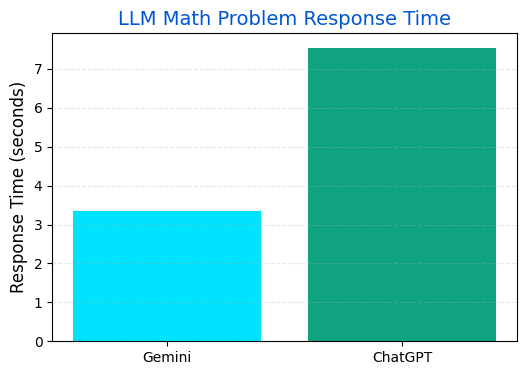

In [10]:
# ============================================================
# 🧑‍💻 Hands-On: Exploring LLM Prompt Engineering & Model Choice
# ============================================================

"""
Task:
1. Choose a different math equation (e.g., a different cubic, a system of equations, or even a word problem).
2. Experiment with your prompt style! For example:
    - Ask the LLM to "show every step"
    - Use ReAct: "First, reflect on what is needed, then solve, then verify your solution"
    - Ask for self-evaluation: "Explain why your answer makes sense"
3. Try at least TWO different LLMs (e.g., Gemini, ChatGPT, or another you have access to).
4. Record response content and timing in a DataFrame.
5. At the end, **write down your observations**:
    - Did the prompt style or LLM change the accuracy or reasoning?
    - Which model did better? Was ReAct or self-checking effective?
"""

# Experiment 1: Math (Algebra) word problem of solving systems of Linear Equation
# Prompt style: Chain-of-Thought with ReAct
# LLMs: Chatgpt & Gemini
# model: "gpt-4-turbo", "gemini-1.5-flash-latest"


import time
import matplotlib.pyplot as plt   # For plotting response times
import pandas as pd               # For tabular storage and display

from langchain.schema import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.chat_models import ChatOpenAI

prompt = (
    "Alice is a student who loves to buy stationery. She has $28 and wants to buy some notebooks at $4 each and pens at $2 each. Is she buys 8 items in total, how many of each did she buy?"
     "Use Chain-of-Thought (ie, think step by step). First, reflect on what is needed. Then solve the word problem. Finally, verify your solution"
)

# -------------------------------------------------------------
# 🤖 Initialize LLMs: Gemini & ChatGPT (Low Temp for Accuracy)
# -------------------------------------------------------------
gemini_llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash-latest", temperature=0.3)
chatgpt_llm = ChatOpenAI(model_name="gpt-4-turbo", temperature=0.3)

# -------------------------------------------------------------
# ⏱️ Get LLM Responses & Measure Response Time
# -------------------------------------------------------------
start_gemini = time.time()
gemini_response = gemini_llm.invoke([HumanMessage(content=prompt)])
end_gemini = time.time()
gemini_time = end_gemini - start_gemini

start_chatgpt = time.time()
chatgpt_response = chatgpt_llm.invoke([HumanMessage(content=prompt)])
end_chatgpt = time.time()
chatgpt_time = end_chatgpt - start_chatgpt

# -------------------------------------------------------------
# 📋 Store Model Outputs & Timing in a Table
# -------------------------------------------------------------
responses = pd.DataFrame({
    "Model": ["Gemini", "ChatGPT"],
    "Response": [gemini_response.content, chatgpt_response.content],
    "Response Time (s)": [gemini_time, chatgpt_time]
})

# 🖥️ Display table for easy side-by-side review
display(responses)

# -------------------------------------------------------------
# 📈 Visualize: Response Time Comparison (Brand Colors)
# -------------------------------------------------------------
plt.figure(figsize=(6,4))
plt.bar(
    responses["Model"],
    responses["Response Time (s)"],
    color=["#00E3FF", "#10A37F"]  # Gemini blue, OpenAI green
)
plt.ylabel("Response Time (seconds)", fontsize=12)
plt.title("LLM Math Problem Response Time", fontsize=14, color="#0055d4")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

# ------------------------------------------------------------------------------
# 🧐 Notes & Analysis:
#   - The word problem should give a final answer as: 6 notebooks & 2 pens
#
# ------------------------------------------------------------------------------


,Model,Response,Response Time (s)
0,Gemini,"Let's solve this problem in a few different ways:\n\n**Method 1: Trial and Error**\n\nSince Alice bought 8 items total, let's try different combinations of notebooks and pens:\n\n* **Scenario 1:** 7 notebooks (7 * $4 = $28), 1 pen (1 * $2 = $2). Total cost: $30. This exceeds her budget.\n* **Scenario 2:** 6 notebooks (6 * $4 = $24), 2 pens (2 * $2 = $4). Total cost: $28. This works!\n\nTherefore, Alice bought 6 notebooks and 2 pens.\n\n\n**Method 2: Algebraic Approach**\n\nLet's use variables:\n\n* Let 'n' represent the number of notebooks.\n* Let 'p' represent the number of pens.\n\nWe can set up two equations based on the given information:\n\n* **Equation 1 (total items):** n + p = 8\n* **Equation 2 (total cost):** 4n + 2p = 28\n\nWe can solve this system of equations. Let's solve Equation 1 for 'n':\n\nn = 8 - p\n\nNow substitute this value of 'n' into Equation 2:\n\n4(8 - p) + 2p = 28\n\n32 - 4p + 2p = 28\n\n32 - 2p = 28\n\n-2p = -4\n\np = 2\n\nNow substitute the value of 'p' back into the equation n = 8 - p:\n\nn = 8 - 2\n\nn = 6\n\nTherefore, Alice bought 6 notebooks and 2 pens.\n\n\n**Method 3: Logical Deduction**\n\nIf Alice bought only notebooks, she could buy a maximum of 7 (7 * $4 = $28). If she bought only pens, she could buy a maximum of 14 (14 * $2 = $28).\n\nSince she bought 8 items, and notebooks are more expensive, let's assume she bought a lot of pens. Let's try subtracting pens in pairs ($4 total) from her budget until we reach a number divisible by 4 (the cost of a notebook).\n\n* Start with 8 pens (8 * $2 = $16). This leaves $12 ($28 - $16). This is divisible by 4 (3 notebooks). This gives us 3 notebooks and 8 pens, which is 11 items, more than she bought.\n\n* Let's try fewer pens. If she bought 6 pens (6 * $2 = $12), she would have $16 left ($28 - $12). This is divisible by 4 (4 notebooks). This gives us 4 notebooks and 6 pens, which is 10 items.\n\n* Let's try 2 pens (2 * $2 = $4), leaving $24 ($28 - $4). This is divisible by 4 (6 notebooks). This gives us 6 notebooks and 2 pens, which is 8 items. This satisfies the conditions.\n\n\n**Why the answer is correct:**\n\nThe solution of 6 notebooks and 2 pens is correct because it satisfies both conditions:\n\n1. **Total items:** 6 + 2 = 8 items\n2. **Total cost:** (6 * $4) + (2 * $2) = $24 + $4 = $28\n\nAll three methods lead to the same conclusion, confirming the accuracy of the answer.",5.959664
1,ChatGPT,"Method 1: Algebraic Solution\nLet's denote the number of notebooks Alice buys as ""n"" and the number of pens as ""p"". We know two things from the problem:\n\n1) n + p = 8 (because she buys 8 items in total)\n2) 4n + 2p = 28 (because she spends $28 in total, with each notebook costing $4 and each pen costing $2)\n\nWe can solve this system of equations by substitution or elimination. If we multiply the first equation by 2, we get 2n + 2p = 16. Subtracting this from the second equation gives us 2n = 12, so n = 6. Substituting n = 6 into the first equation gives us 6 + p = 8, so p = 2.\n\nSo Alice bought 6 notebooks and 2 pens.\n\nMethod 2: Trial and Error\nWe know Alice bought 8 items in total. If she bought only notebooks, she would have spent $32, which is more than she has. So we know she must have bought at least one pen. If she bought one pen and the rest notebooks, she would have spent $30, which is still too much. If she bought two pens and the rest notebooks, she would have spent $28, which is exactly how much she has. So this is the solution: Alice bought 2 pens and 6 notebooks.\n\nMethod 3: Logical Reasoning\nWe know that notebooks are more expensive than pens, so if Alice wants to maximize the number of items she can buy, she should buy more notebooks. Since she has $28 and notebooks cost $4 each, she can buy up to 7 notebooks. But this would only leave her with $0 for pens, and we know she bought 8 items in total. So she must have bought fewer than 7 notebooks. If she bought 6 notebooks, this woul

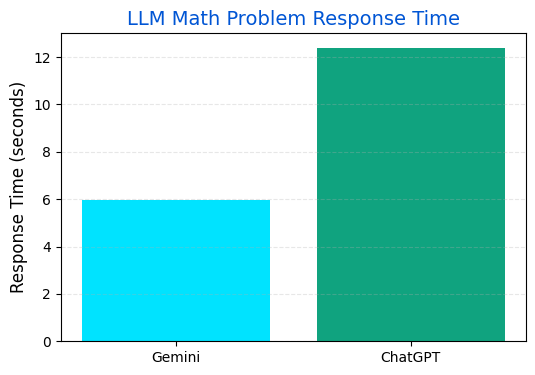

In [13]:
# Experiment 2: Same Math problem as above
# Prompt style: Self-consistency & Self-evaluation
# LLMs: Chatgpt & Gemini
# model: "gpt-4", "gemini-1.5-flash-latest"


import time
import matplotlib.pyplot as plt   # For plotting response times
import pandas as pd               # For tabular storage and display

from langchain.schema import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.chat_models import ChatOpenAI

prompt = (
    "Alice is a student who loves to buy stationery. She has $28 and wants to buy some notebooks at $4 each and pens at $2 each. Is she buys 8 items in total, how many of each did she buy?"
     "Think of this problem step by step, and try to solve it in few different ways. After you have found out the answer, explain why is it correct"
)

# -------------------------------------------------------------
# 🤖 Initialize LLMs: Gemini & ChatGPT (Low Temp for Accuracy)
# -------------------------------------------------------------
gemini_llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash-latest", temperature=0.3)
chatgpt_llm = ChatOpenAI(model_name="gpt-4", temperature=0.3)

# -------------------------------------------------------------
# ⏱️ Get LLM Responses & Measure Response Time
# -------------------------------------------------------------
start_gemini = time.time()
gemini_response = gemini_llm.invoke([HumanMessage(content=prompt)])
end_gemini = time.time()
gemini_time = end_gemini - start_gemini

start_chatgpt = time.time()
chatgpt_response = chatgpt_llm.invoke([HumanMessage(content=prompt)])
end_chatgpt = time.time()
chatgpt_time = end_chatgpt - start_chatgpt

# -------------------------------------------------------------
# 📋 Store Model Outputs & Timing in a Table
# -------------------------------------------------------------
responses = pd.DataFrame({
    "Model": ["Gemini", "ChatGPT"],
    "Response": [gemini_response.content, chatgpt_response.content],
    "Response Time (s)": [gemini_time, chatgpt_time]
})

# 🖥️ Display table for easy side-by-side review
display(responses)

# -------------------------------------------------------------
# 📈 Visualize: Response Time Comparison (Brand Colors)
# -------------------------------------------------------------
plt.figure(figsize=(6,4))
plt.bar(
    responses["Model"],
    responses["Response Time (s)"],
    color=["#00E3FF", "#10A37F"]  # Gemini blue, OpenAI green
)
plt.ylabel("Response Time (seconds)", fontsize=12)
plt.title("LLM Math Problem Response Time", fontsize=14, color="#0055d4")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

# ------------------------------------------------------------------------------
# 🧐 Notes & Analysis:
#   - The word problem should give a final answer as: 6 notebooks & 2 pens
#
# ------------------------------------------------------------------------------

In [ ]:
# ============================================================
# 🔎 Gemini Model Explorer: List Top 10 Newest Models
# ============================================================

# Import the Gemini model listing function
from google.generativeai import list_models
import pandas as pd

# ------------------------------------------------------------
# 🚀 Fetch & Display: Newest Gemini Models (Top 10)
# ------------------------------------------------------------
gemini_data = []
try:
    model_list = list(list_models())
    # 🗂️ Sort by model name in reverse (often, higher = newer)
    model_list_sorted = sorted(model_list, key=lambda m: m.name, reverse=True)
    for m in model_list_sorted[:10]:  # Show only the top 10
        gemini_data.append({
            "Model Name": m.name,
            "Supported Methods": ", ".join(m.supported_generation_methods)
        })
    df_gemini = pd.DataFrame(gemini_data)

    print("🔵 === Top 10 Newest Gemini Models ===")
    display(df_gemini)

    if not gemini_data:
        print("⚠️ No Gemini models found. Your API key may not have access, or Gemini is not available in your region/account.")

except Exception as e:
    print("❌ Error:", e)


In [ ]:
# ============================================================
# 🔵 OpenAI Model Explorer: List Newest Models & Metadata
# ============================================================

import os
import pandas as pd
from openai import OpenAI

# ------------------------------------------------------------
# 🗝️ Load OpenAI API Key from Environment
# ------------------------------------------------------------
openai_key = os.environ.get("OPENAI_API_KEY", None)
model_data = []

if openai_key:
    try:
        # 🤖 Connect to OpenAI and retrieve models
        client = OpenAI(api_key=openai_key)
        # 📋 Sort models by name/id in reverse (newest first)
        models = sorted(client.models.list().data, key=lambda m: m.id, reverse=True)
        for m in models[:15]:  # Show up to 15 models
            model_data.append({
                "Model Name": m.id,
                "Owned By": getattr(m, "owned_by", ""),
                "Created": getattr(m, "created", ""),
                "Object": getattr(m, "object", "")
                # Note: Purpose/Description not present in API!
            })
        df = pd.DataFrame(model_data)
        print("🔵 === Newest OpenAI Models: Metadata ===")
        display(df)
        if not model_data:
            print("⚠️ No OpenAI models found. Your API key may not have access, or your account is limited.")
    except Exception as e:
        print("❌ Error checking OpenAI API key:", str(e))
else:
    print("⚠️ No OpenAI API key found in environment.")


<div style="background: linear-gradient(135deg, #001a70 0%, #0055d4 100%); color: white; padding: 24px; border-radius: 12px; margin-bottom: 20px;">
  <h2 style="margin-top:0; font-size: 26px;">🤗 Introduction: Hugging Face & Classic LLMs</h2>
  <p style="font-size: 16px;">
    <strong>Hugging Face</strong> is an open-source platform that hosts thousands of ready-to-use machine learning models, making it easy to experiment with and deploy powerful language models locally or in the cloud.<br>
    In this section, we'll compare two popular Hugging Face models:
  </p>
  <ul style="font-size: 16px; margin: 18px 0 8px 18px;">
    <li><span style="font-size: 20px;">🤖</span> <b>GPT-2</b> – One of the first large language models to generate human-like text. It set the stage for the modern LLM boom, and remains a classic benchmark.</li>
    <li><span style="font-size: 20px;">⚡</span> <b>DistilGPT2</b> – A smaller, faster, and more efficient version of GPT-2. It offers nearly the same capabilities but with lighter resource requirements, making it ideal for quick prototyping.</li>
  </ul>
  <p style="font-size: 15px;">
    We'll see how each model responds to creative prompts and compare their outputs side by side!
  </p>
</div>


In [ ]:
# ============================================================
# 🛠️ Setup: Install & Import Required Packages for HF Pipelines
# ============================================================

!pip install -q --upgrade langchain langchain-huggingface transformers

from langchain_huggingface import HuggingFacePipeline   # Wraps Hugging Face models for LangChain
from transformers import pipeline                       # Builds local text-generation pipelines
from langchain.schema import HumanMessage               # Formats chat/user messages for LLMs


In [ ]:
# =============================================================
# 🤗☕ Compare Local Hugging Face LLMs: GPT-2 vs. DistilGPT2
# =============================================================

import pandas as pd  # For tabular output

model_ids = [
    ("🤖 GPT-2", "gpt2"),
    ("⚡ DistilGPT2", "distilgpt2"),
]

prompt = "What will be the future of AI in 2050?!"

responses = []

for model_name, model_id in model_ids:
    # 'pipeline' builds a ready-to-use text-generation model from Hugging Face with a single command
    hf_pipe = pipeline("text-generation", model=model_id, max_new_tokens=250)
    llm = HuggingFacePipeline(pipeline=hf_pipe)
    response = llm.invoke([HumanMessage(content=prompt)])
    responses.append({"Model": model_name, "Response": response.strip()})

# Save and display the DataFrame of responses
df_response = pd.DataFrame(responses)
print("🔵 Model responses to the prompt:")
display(df_response)


In [ ]:
# =============================================================
# 🧪 Hands-On: Getting Better Answers from DistilGPT2
# =============================================================

# Background:
# DistilGPT2 is a smaller, faster version of GPT-2.
# While it's efficient, it often just repeats the prompt or gives very generic answers.
# This happens because it isn't specifically trained to follow instructions or answer questions directly.

# Your Task:
# 1. Try using DistilGPT2 for an open-ended question (e.g., "What will be the future of AI in 2050?").
# 2. Observe if it repeats the prompt or gives an unhelpful answer.

# To improve its output, experiment with these techniques:
#   - Make your prompt longer or more explicit (e.g., "Q: What is the future of AI in 2050?\nA:").
#   - Add clear instructions or a separator (e.g., "Answer in 2 sentences: ...").
#   - Enable sampling and set temperature higher (e.g., do_sample=True, temperature=0.8).
#   - Try using the full GPT-2 model for comparison.

# For each approach:
# - Record what happens. Does the model's output improve? When does it still repeat or ignore the prompt?
# - Compare your best DistilGPT2 output to GPT-2’s response.
# - Summarize your observations and submit them as your exercise report.


<div style="font-family: Arial, sans-serif; max-width: 600px; margin: 0 auto; line-height: 1.6; color: #333;">
  <h2 style="color: #0055d4; border-bottom: 2px solid #0055d4; padding-bottom: 8px;">
    The Leap from GPT-2 to Today’s Super-Models
  </h2>
  <p>
    Back in 2019, <strong>GPT-2</strong> shook the world with its 1.5 billion parameters (and even a distilled 82 million version) by generating surprisingly coherent paragraphs from web-scraped text. It proved that transformers could model language at scale—but still struggled with long-form reasoning, factual accuracy, and open-ended prompts.
  </p>
  <p>
    Its lighter sibling, <strong>DistilGPT2</strong>, was optimized for speed and efficiency but often echoes the prompt or produces very basic completions, especially for creative or complex questions. This is a common limitation with small, “vanilla” language models that haven’t been tuned for instruction or dialogue.
  </p>
  <p>
    Fast forward to today: modern LLMs boast tens or hundreds of billions of parameters, trained on diverse, multilingual data and fine-tuned with human feedback. They not only write essays and debug code, but also follow instructions, explain reasoning, and adapt to specialized domains. The leap from “sometimes impressive, often generic” to “genuinely useful and insightful” has happened in just a few years—a testament to the rapid evolution of generative AI.
  </p>
</div>


<div style="background: linear-gradient(135deg, #f0f5ff 0%, #e6f0ff 100%); border-radius: 12px; padding: 25px; margin-bottom: 25px; border: 1px solid #0055d4;">
  <h2 style="color: #0055d4; margin-top: 0; font-size: 26px; padding-bottom: 10px; border-bottom: 2px solid #0055d4;">🦅 Falcon: High-Performance Open-Source Large Language Model</h2>
  <p style="font-size: 16px; color: #222; line-height: 1.7; margin-bottom: 18px;">
    <b>Falcon</b> is a state-of-the-art, open-source large language model (LLM) developed by the <a href="https://www.tii.ae/" target="_blank" style="color:#0055d4;text-decoration:underline;"><b>Technology Innovation Institute (TII)</b></a> in Abu Dhabi. Falcon stands out for its high efficiency and performance, and is widely adopted in both research and industry.
  </p>
  <ul style="margin-bottom: 18px; font-size: 16px;">
    <li>🚀 Available in multiple sizes: <b>Falcon-7B</b> and <b>Falcon-40B</b></li>
    <li>⚡ Optimized for low memory usage and fast inference</li>
    <li>🛠️ Supports a broad range of NLP tasks (text generation, summarization, chat, and more)</li>
    <li>🌐 Fully open-source with community support on Hugging Face</li>
  </ul>
  <div style="margin-bottom: 10px; font-size: 16px;">
    <b>Useful Resources:</b>
    <ul>
      <li><a href="https://huggingface.co/tiiuae/falcon-7b" target="_blank" style="color:#0055d4;">Falcon-7B Model Card (Hugging Face)</a></li>
      <li><a href="https://github.com/tiiuae/falcon-llm" target="_blank" style="color:#0055d4;">Falcon GitHub Repository</a></li>
    </ul>
  </div>
  <div style="background: #e6f0ff; border-radius: 8px; padding: 14px 18px; margin-top: 16px; border-left: 5px solid #0055d4;">
    <b>Why Falcon?</b> <br>
    Falcon models are a powerful choice for building efficient, scalable AI applications, and serve as a strong open-source alternative to proprietary LLMs.
  </div>
</div>


In [ ]:
"""
# =============================================================
# 🦾 Falcon-7B: Local Model Loading & Pipeline Initialization
# =============================================================

- Loads the Falcon-7B large language model and tokenizer using Hugging Face `transformers`.
- Sets up a text-generation pipeline that runs efficiently on your Colab or local GPU (using bfloat16 precision and auto device selection).
- This pipeline lets you generate human-like text locally—no internet or external API needed once the model is downloaded.
"""

from transformers import AutoTokenizer, pipeline
import torch

# Specify the model name (Falcon-7B)
model = "tiiuae/falcon-7b"

# Load the tokenizer for the Falcon-7B model
tokenizer = AutoTokenizer.from_pretrained(model)

# Build a text-generation pipeline for efficient local inference
text_pipeline = pipeline(
    "text-generation",           # Task: generate text
    model=model,                 # Model to use
    tokenizer=tokenizer,         # Tokenizer to use
    torch_dtype=torch.bfloat16,  # Use bfloat16 for memory efficiency (if supported)
    device_map="auto",           # Automatically use GPU if available
)


> ### ⚡️ How Does This Cell Work?
>
> - The code imports 🤗 `transformers` and loads the Falcon-7B model directly into your Colab session.
> - Downloading and setting up the model **can take several minutes** (due to the large size and initial processing).
> - **Falcon-7B is an open-source model**: you don't need any API key, and all text generation happens locally on your Colab GPU—no outside cloud service required!


In [ ]:
"""
# =============================================================
# ☕🦾 Falcon-7B CalmMindBot: AI Multi-Turn Wellness Demo
# =============================================================
"""

prompt = (
    "CalmMindBot is a compassionate AI assistant who supports people with stress and emotional wellness."
    "\nUser: Hi CalmMindBot, I’ve been feeling overwhelmed lately. What’s a simple way to relax?"
    "\nCalmMindBot:"
)

sequences = text_pipeline(
    prompt,
    max_new_tokens=600,        # Allow for several conversation turns
    do_sample=True,
    top_k=15,
    num_return_sequences=1,
    eos_token_id=tokenizer.eos_token_id,
)

for seq in sequences:
    full_text = seq['generated_text']
    # Split at each role's tag (User: or CalmMindBot:)
    import re
    dialogue_lines = re.split(r'(User:|CalmMindBot:)', full_text)
    # The split leaves ['', 'User:', '...', 'CalmMindBot:', '...', ...]
    # So we iterate in steps of 2, skipping any empty initial
    for i in range(1, len(dialogue_lines), 2):
        speaker = dialogue_lines[i].strip()
        content = dialogue_lines[i+1].strip()
        if speaker == "User:":
            print(f"👤 User: {content}\n")
        elif speaker == "CalmMindBot:":
            print(f"🤖 CalmMindBot: {content}\n")


> ### 🤔 How Does a Transformer Model Like Falcon-7B Generate Text?
>
> - The `transformers` library loads the Falcon-7B model’s weights into your computer or Colab GPU.
> - When you give it a prompt, the model **processes each word (token) step by step**, multiplying learned weights (from its neural network) to predict the most likely next word.
> - This process repeats, one token at a time, until the model completes its response—creating answers that seem natural and relevant.
>
> In short: you provide a starting message, and the model uses its “learned math” (weights) to generate a reply, token by token!


In [ ]:
# ✋ **Hands-On: Querying Falcon-7B with LangChain**
# Replace the placeholders to:
# 1️⃣ Initialize the Hugging Face model correctly.
# 2️⃣ Use the correct method to query the model.
# 3️⃣ Store the response in the right variable.

from langchain_huggingface import HuggingFaceEndpoint

# ✅ Step 1: Initialize the Falcon model
llm_falcon = ----- (repo_id="tiiuae/falcon-7b-instruct")  # 🔧 Replace '-----' with the correct class

# ✅ Step 2: Define the question
question = "How will AI impact the job market in the next decade?"

# ✅ Step 3: Query the model
response_falcon = llm_falcon.----- (question)  # 🔧 Replace '-----' with the correct method

# ✅ Display the response
print("🔹 Falcon-7B Response:", response_falcon)


## 🎉 Congratulations!

You have successfully completed the **Introduction to LangChain** lab. 🚀  
We hope you found it insightful and are excited to explore more!  

💡 **Next Steps:**  
- Try using different LLMs in LangChain.  
- Experiment with structured vs. plain text prompts.  
- Explore advanced features like memory and chains.

Happy Coding! 💻✨  
